In [2]:
lr_grouped_rewards

[array([0.376975, 0.477195, 0.62579 , 1.016715, 3.999875, 6.126425,
        6.64306 , 6.34733 , 6.316855, 6.26088 , 6.440455, 6.134005,
        6.67214 , 6.300565, 6.235155, 6.402555, 6.55862 , 6.53204 ,
        6.693425, 6.45917 , 6.32571 , 6.563125, 6.427335, 6.354835,
        6.360355]),
 array([0.64122 , 4.16839 , 6.112035, 5.851015, 5.7833  , 6.100035,
        6.0004  , 6.071895, 5.95837 , 6.264635, 5.975125, 6.140325,
        6.098055, 6.216615, 6.175515, 6.0142  , 5.90175 , 5.96568 ,
        6.0565  , 6.17811 , 5.970105, 6.064645, 5.934895, 6.163935,
        5.758505]),
 array([3.026235, 5.556975, 5.775465, 5.350835, 5.65702 , 5.611725,
        5.513605, 5.39819 , 5.913425, 5.44661 , 5.52353 , 5.734875,
        5.42187 , 5.62788 , 5.617695, 5.635605, 5.46108 , 5.5287  ,
        5.61138 , 5.80511 , 5.35361 , 5.527215, 5.695315, 5.600015,
        5.661435]),
 array([4.80449 , 5.184935, 4.981445, 5.156985, 5.171065, 4.91415 ,
        4.641185, 4.78443 , 4.37377 , 4.82311 , 5.14424 


Training with learning rate: 0.1
  Episode 10000 complete
  Episode 20000 complete
  Episode 30000 complete
  Episode 40000 complete
  Episode 50000 complete

Training with learning rate: 0.3
  Episode 10000 complete
  Episode 20000 complete
  Episode 30000 complete
  Episode 40000 complete
  Episode 50000 complete

Training with learning rate: 0.5
  Episode 10000 complete
  Episode 20000 complete
  Episode 30000 complete
  Episode 40000 complete
  Episode 50000 complete

Training with learning rate: 0.7
  Episode 10000 complete
  Episode 20000 complete
  Episode 30000 complete
  Episode 40000 complete
  Episode 50000 complete


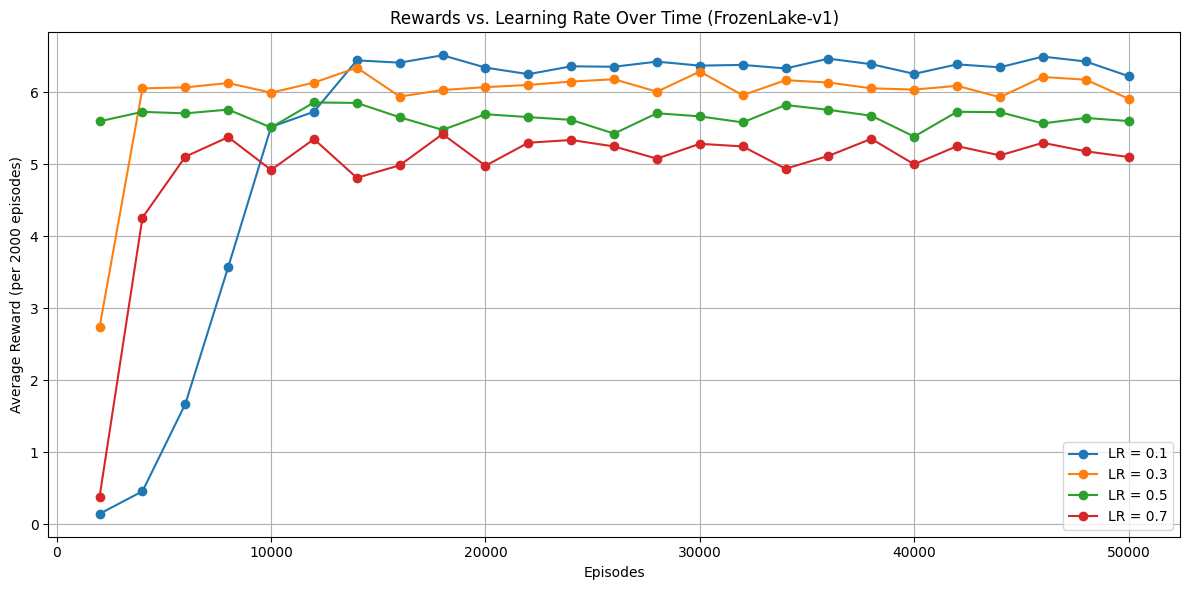

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Environment Setup
env = gym.make('FrozenLake-v1', is_slippery=True)
state_space = env.observation_space.n
action_space = env.action_space.n

# Global Parameters
episodes = 50000
group_size = 2000
num_groups = episodes // group_size
epsilon_decay_rate = 0.0005
min_epsilon = 0.01
discount_factor = 0.99
learning_rates = [0.1, 0.3, 0.5, 0.7]

# Helper Functions
def epsilon_greedy_action(state, epsilon, Q_table):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    return np.argmax(Q_table[state])

def update_q_value(Q_table, state, action, reward, next_state, learning_rate, discount_factor):
    best_next_action = np.argmax(Q_table[next_state])
    target = reward + discount_factor * Q_table[next_state, best_next_action]
    Q_table[state, action] += learning_rate * (target - Q_table[state, action])

# Store grouped rewards for each LR
lr_grouped_rewards = []

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    Q_table = np.zeros((state_space, action_space))
    epsilon = 1.0
    rewards_per_episode = []

    for episode in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            action = epsilon_greedy_action(state, epsilon, Q_table)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            reward = -0.01 if reward == 0 else 10  # Reward shaping

            update_q_value(Q_table, state, action, reward, next_state, lr, discount_factor)
            state = next_state
            total_reward += reward

        epsilon = max(min_epsilon, epsilon * np.exp(-epsilon_decay_rate * episode))
        rewards_per_episode.append(total_reward)

        if (episode + 1) % 10000 == 0:
            print(f"  Episode {episode + 1} complete")

    # Group rewards into 2000-episode chunks
    grouped_avg = np.mean(np.array(rewards_per_episode).reshape(num_groups, group_size), axis=1)
    lr_grouped_rewards.append(grouped_avg)

# Plotting: Rewards vs Learning Rate Over Time
plt.figure(figsize=(12, 6))
x_vals = np.arange(1, num_groups + 1) * group_size

for i, lr in enumerate(learning_rates):
    plt.plot(x_vals, lr_grouped_rewards[i], marker='o', label=f"LR = {lr}")

plt.xlabel("Episodes")
plt.ylabel("Average Reward (per 2000 episodes)")
plt.title("Rewards vs. Learning Rate Over Time (FrozenLake-v1)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [10]:
len(lr_grouped_rewards[0])

25

In [11]:
comparative_QL = []
for i in range(5):
    comparative_QL.append(sum(lr_grouped_rewards[i])//25)
comparative_QL

[5.0, 5.0, 5.0, 4.0, 0.0]